# Check data for the spatial transcriptome dataset


# 1) Check image and count data

In [38]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import re
import tifffile

In [39]:
image_file =  "./dataset/Visium_FFPE_Human_Breast_Cancer_image.tif"
count_file =  "./dataset/Counts.txt"
transformation_file =  "./dataset/Spot_metadata.csv"


In [55]:
# Read counts file

pd_count = pd.read_table(count_file, index_col=0)
pd_count

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1
GTAGACAACCGATGAA-1,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2.0
ACAGATTAGGTTAGTG-1,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
TGGTATCGGTCTGTAT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ATTATCTCGACAGATC-1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TGAGATCAAATACTCA-1,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCCCTGAGGATGGGCT-1,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
CGGGCGATGGATCACG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
TGCGGACTTGACTCCG-1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
TCGCTGCCAATGCTGT-1,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0


In [41]:
# Read Image
image = tifffile.imread(image_file)
image.shape

(25233, 27452, 3)

In [42]:
# Read position meta file
pd_meta = pd.read_table(transformation_file, index_col=0, sep=",")
pd_meta

,Row,Col,X,Y,Spot_radius
0,,,,,
GTAGACAACCGATGAA-1,7,55,5406,13126,94
ACAGATTAGGTTAGTG-1,7,57,5407,13417,94
TGGTATCGGTCTGTAT-1,7,59,5407,13707,94
ATTATCTCGACAGATC-1,7,61,5407,13997,94
TGAGATCAAATACTCA-1,7,63,5407,14287,94
...,...,...,...,...,...
GCCCTGAGGATGGGCT-1,68,74,20805,15869,94
CGGGCGATGGATCACG-1,69,75,21057,16013,94
TGCGGACTTGACTCCG-1,68,76,20805,16159,94


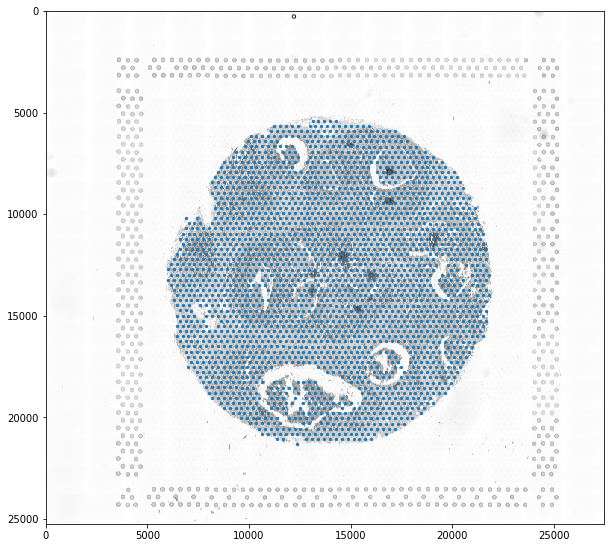

In [43]:
### Verify whether image dimensions align with metadata coordinates.
### In this dataset, the X and Y axes appear swapped, so we switch them for analysis.

coords_x = pd_meta.loc[:, "Y"].values
coords_y = pd_meta.loc[:, "X"].values
plt.figure(figsize=(10, 10))
plt.imshow(image[..., 0]/255, cmap="gray")
plt.scatter(coords_x, coords_y, s=5)
plt.gca().set_aspect('equal')
plt.xlim(0, image.shape[1])
plt.ylim(image.shape[0], 0)
plt.show()

## Process count file

In [56]:
print("Original count size: {}".format(np.shape(pd_count)))

# Remove all 0s genes
gene_sum = np.sum(pd_count, axis=0)
gene_names = gene_sum.index.values[gene_sum > 0]
pd_count_norm = pd_count.loc[:, gene_names]

# CPM normalization
for n_row in range(len(pd_count_norm)):
    pd_count_norm.iloc[n_row, :] = pd_count_norm.iloc[n_row, :] / np.sum(pd_count_norm.iloc[n_row, :]) * 1000000

Original count size: (2518, 17941)


In [57]:
pd_count_norm

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1
GTAGACAACCGATGAA-1,0.0,0.0,406.442107,0.0,0.0,0.000000,0.0,101.610527,0.0,0.0,...,101.610527,0.0,0.0,0.0,0.0,0.000000,101.610527,0.000000,101.610527,203.221054
ACAGATTAGGTTAGTG-1,0.0,0.0,460.794102,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,153.598034,0.0,0.0,0.0,0.0,0.000000,0.000000,153.598034,153.598034,153.598034
TGGTATCGGTCTGTAT-1,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
ATTATCTCGACAGATC-1,0.0,0.0,209.489892,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
TGAGATCAAATACTCA-1,0.0,0.0,337.040782,0.0,0.0,168.520391,0.0,0.000000,0.0,0.0,...,168.520391,0.0,0.0,0.0,0.0,0.000000,0.000000,168.520391,337.040782,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCCCTGAGGATGGGCT-1,0.0,0.0,320.410125,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,160.205062,0.0,0.0,0.0,0.0,160.205062,0.000000,0.000000,0.000000,160.205062
CGGGCGATGGATCACG-1,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,795.070563,0.000000
TGCGGACTTGACTCCG-1,0.0,0.0,325.097529,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,650.195059,0.000000
TCGCTGCCAATGCTGT-1,0.0,0.0,1254.115065,0.0,0.0,0.000000,0.0,313.528766,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,940.586299,0.000000


__calculate mean and variance__

In [58]:
count_stat = pd.DataFrame(columns=pd_count_norm.columns.values, index=["mean", "std", "tile_95", "non_zero_p", "max"])
count_stat.loc['mean', :] = np.average(pd_count_norm, axis=0)
count_stat.loc['std', :] = np.std(pd_count_norm, axis=0)
count_stat.loc['tile_95', :] = np.quantile(pd_count_norm, 0.95, axis=0)
count_stat.loc['non_zero_p', :] = np.sum(np.array(pd_count_norm) > 0, axis=0)/pd_count_norm.shape[0]
count_stat.loc['max', :] = np.max(pd_count_norm, axis=0)

In [59]:
count_stat

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1
mean,1.16575,0.0147705,286.655,0.214356,0.358131,37.4068,0.268751,40.7762,21.2639,3.42946,...,25.849,12.0516,18.5968,2.55634,25.5671,37.8556,11.2972,36.643,384.154,92.4881
std,10.5531,0.741029,285.281,5.03408,5.40421,69.7581,4.6875,66.4947,54.8254,17.5053,...,51.2465,33.6507,50.2297,16.8316,53.4999,67.1486,40.6357,65.3114,231.107,107.427
tile_95,0,0,828.751,0,0,187.566,0,172.939,111.622,29.1312,...,128.706,82.832,109.207,0,124.04,163.039,76.4457,157.296,764.319,292.202
non_zero_p,0.0162828,0.000397141,0.823272,0.00238284,0.00516283,0.320095,0.00357427,0.390786,0.230342,0.050834,...,0.285941,0.160048,0.207307,0.0321684,0.284353,0.368149,0.148531,0.362986,0.930103,0.630659
max,195.351,37.192,2671.65,186.567,135.547,624.074,123.183,501.882,1314.06,296.692,...,586.51,417.595,1024.59,292.569,775.795,759.013,1121.08,752.445,3821.66,1027.75


In [49]:
count_stat.to_csv("./run/1_count_stat_breast_cancer_FFPE.csv")

In [63]:
count=pd_count_norm.copy()

In [64]:
# Log2
count = np.log2(count + 1)

# Normalize gene_stat by divided with max
count_max = np.log2(count_stat.loc['max', :].astype(float).values + 1)
count_max[count_max < 1] = 1
count = count/count_max

In [65]:
count

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1
GTAGACAACCGATGAA-1,0.0,0.0,0.761631,0.0,0.0,0.000000,0.0,0.744482,0.0,0.0,...,0.726320,0.0,0.0,0.0,0.0,0.000000,0.659402,0.000000,0.561415,0.766887
ACAGATTAGGTTAGTG-1,0.0,0.0,0.777500,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.790607,0.0,0.0,0.0,0.0,0.000000,0.000000,0.760919,0.611106,0.726753
TGGTATCGGTCTGTAT-1,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
ATTATCTCGACAGATC-1,0.0,0.0,0.677931,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
TGAGATCAAATACTCA-1,0.0,0.0,0.737967,0.0,0.0,0.797309,0.0,0.000000,0.0,0.0,...,0.805059,0.0,0.0,0.0,0.0,0.000000,0.000000,0.774829,0.705950,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GCCCTGAGGATGGGCT-1,0.0,0.0,0.731573,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.797171,0.0,0.0,0.0,0.0,0.766232,0.000000,0.000000,0.000000,0.732786
CGGGCGATGGATCACG-1,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.809787,0.000000
TGCGGACTTGACTCCG-1,0.0,0.0,0.733408,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.785434,0.000000
TCGCTGCCAATGCTGT-1,0.0,0.0,0.904212,0.0,0.0,0.000000,0.0,0.924557,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.830139,0.000000


In [67]:
count.to_csv("./run/1_pd_count_norm_breast_cancer_FFPE.csv")